In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import auc
import seaborn as sns
import ast

In [53]:
def plot_roc_curve_from_df(df):
    mean_fpr = np.linspace(0, 1, 100)
    fig, ax = plt.subplots(figsize=(10, 7))

    list_models = df['model_name'].unique()
    
    for nmodel in list_models:

        # Fixing the logical AND operator by wrapping individual conditions in parentheses
        df_filter = df[(df['model_name'] == nmodel)]
        
        tprs = []
        aucs = []

        for index, row in df_filter.iterrows():
            x = row['FPR'].strip('[]\n ')
            y = row['TPR'].strip('[]\n ')

            x = np.fromstring(x, dtype=float, sep=' ')
            y = np.fromstring(y, dtype=float, sep=' ')

            interp_tpr = np.interp(mean_fpr, x, y)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(row['AUC'])

        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)

        ax.plot(
            mean_fpr,
            mean_tpr,
            '--',
            label=r"Mean ROC (%0.25s AUC = %0.2f $\pm$ %0.2f)" % (nmodel, mean_auc, std_auc),
            lw=2,
            alpha=0.8,
        )

    ax.plot([0, 1], [0, 1], linestyle="-", lw=3, color="r", alpha=0.8)
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontsize=16)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.show()

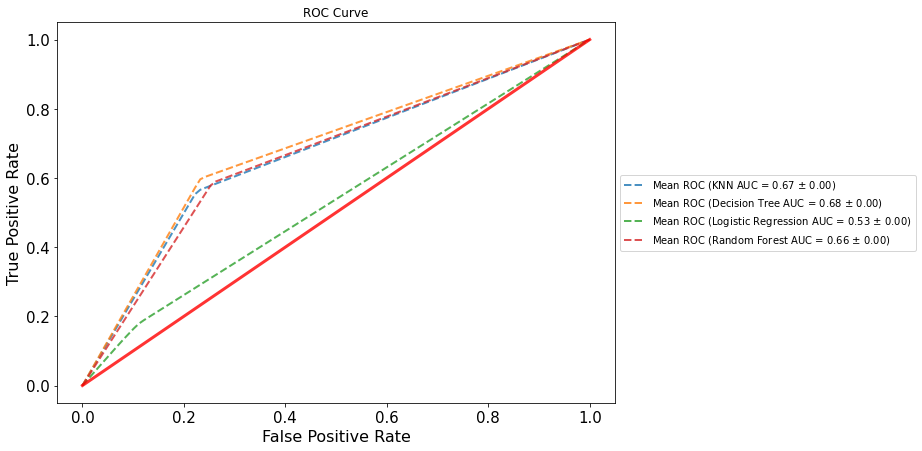

In [54]:
df = pd.read_csv("./results/dengue_results_by_fold.csv")
plot_roc_curve_from_df(df)

In [55]:
def str_to_matrix(s):
    # Remove the outer brackets and newline characters
    s = s.strip('[]\n ')
    
    # Split the string into individual rows
    rows = s.split('\n')
    
    # Split each row into individual elements, ensuring to strip out unwanted characters
    matrix = [list(map(int, row.strip('[] ').split())) for row in rows]
    
    # Convert the list of lists to a numpy array
    matrix = np.array(matrix)
    
    return matrix

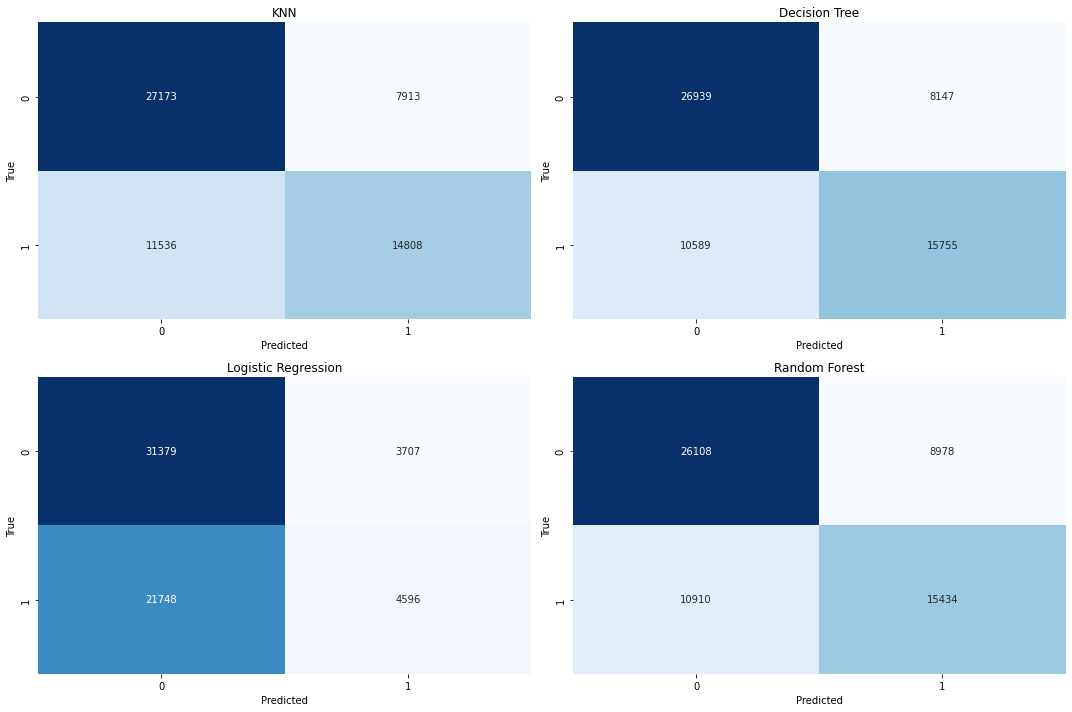

In [56]:
df["Confusion Matrix"] = df["Confusion Matrix"].apply(str_to_matrix)
models = df["model_name"].unique()
confusion_matrices = {model: df[df["model_name"] == model]["Confusion Matrix"] for model in models}
for model_name, cm in confusion_matrices.items():
	# Média das matrizes de confusão
	confusion_matrices[model_name] = np.floor(np.mean(confusion_matrices[model_name],axis=0)).astype(int)



n_models = len(models)
n_cols = 2
n_rows = (n_models + n_cols - 1) // n_cols
# fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i,(model_name,cm) in enumerate(confusion_matrices.items()):
	ax = axes[i]
	sns.heatmap(cm,annot=True, fmt='d', cmap = "Blues",cbar=False,ax=ax)
	ax.set_title(model_name)
	ax.set_xlabel('Predicted')
	ax.set_ylabel('True')

			
plt.tight_layout()
plt.show()	